In [1]:
import numpy as np
import pandas as pd
from numpy import linalg
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
import argparse
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 1. read csv data

In [2]:
# read csv data
data = pd.read_csv("GroupTwo.csv")  # 从GroupTwo.csv文件读取数据集
data.head()  # 查看前5条数据

,UID,Gender,1,2,3,4,5,6,7,8,...,42,43,44,45,46,47,48,49,50,Target
0,C101023,Male,-0.574799,-0.380029,-1.096352,-0.291022,-0.042354,-0.490432,2.045381,0.717843,...,0.261062,0.135793,-2.090111,1.026225,0.838145,-1.025397,-0.844751,0.753220,0.168976,-178.048677
1,C101024,Male,0.392314,1.585433,-0.417128,-0.523164,0.281656,-1.467117,0.948134,-0.849745,...,1.366256,0.410401,0.792790,-0.902152,-0.836587,0.176687,-0.426512,0.199709,0.853579,-40.487714
2,C101025,Female,0.553875,0.914478,0.231617,-0.219017,0.389178,-1.417593,0.537481,-0.707381,...,-3.184978,-0.810813,-1.091629,-1.284408,0.222937,-0.108943,-1.592838,-0.906916,0.411715,187.599863
3,C101026,Female,0.216265,0.411984,2.600224,-1.222198,-2.090062,-0.629909,0.102066,-0.173401,...,-0.238356,0.585549,-1.085922,1.323357,0.493976,-1.703385,0.450012,0.696394,-1.799845,-407.127874
4,C101027,Male,-1.168350,0.724284,-1.057225,-1.194442,0.642174,-1.574047,0.551738,-0.085371,...,-0.324180,0.923222,0.144830,0.117625,2.051371,-1.647830,-1.128930,-1.028913,0.905876,-305.784010


# 2. transform data

In [3]:
# transform data: string -> float
gender_map = {"Male": 0, "Female": 1}  
data["Gender"] = data["Gender"].map(gender_map)   # 文本特征向量化，将字符串类型的性别转换为数字，便于后面的类型转换和计算（numpy的array类型里面只能是数字）。

,UID,Gender,1,2,3,4,5,6,7,8,...,42,43,44,45,46,47,48,49,50,Target
0,C101023,0,-0.574799,-0.380029,-1.096352,-0.291022,-0.042354,-0.490432,2.045381,0.717843,...,0.261062,0.135793,-2.090111,1.026225,0.838145,-1.025397,-0.844751,0.753220,0.168976,-178.048677
1,C101024,0,0.392314,1.585433,-0.417128,-0.523164,0.281656,-1.467117,0.948134,-0.849745,...,1.366256,0.410401,0.792790,-0.902152,-0.836587,0.176687,-0.426512,0.199709,0.853579,-40.487714
2,C101025,1,0.553875,0.914478,0.231617,-0.219017,0.389178,-1.417593,0.537481,-0.707381,...,-3.184978,-0.810813,-1.091629,-1.284408,0.222937,-0.108943,-1.592838,-0.906916,0.411715,187.599863
3,C101026,1,0.216265,0.411984,2.600224,-1.222198,-2.090062,-0.629909,0.102066,-0.173401,...,-0.238356,0.585549,-1.085922,1.323357,0.493976,-1.703385,0.450012,0.696394,-1.799845,-407.127874
4,C101027,0,-1.168350,0.724284,-1.057225,-1.194442,0.642174,-1.574047,0.551738,-0.085371,...,-0.324180,0.923222,0.144830,0.117625,2.051371,-1.647830,-1.128930,-1.028913,0.905876,-305.784010


In [4]:
# transfrom data from dataframe to numpy array 
raw_data_mat = np.array(data)   # 将pandas的DataFrame类型转换为numpy的array类型
feature_mat = raw_data_mat[:, 1:-1].astype(float)   # 特征集。数据切片，中括号里面逗号前面的“:”表示所有行，后面表示行号第2列到倒数第2列（左闭右开区间），类型为浮点型
target_mat = raw_data_mat[:, -2:-1].astype(float)   # Label集。原理同上，实际上就是最后一列的“Target”数据
print "feature:"
print feature_mat[:2, :5]   # 打印特征集前两行的前五列数据
print "target:"
print target_mat[:2, :5]   # 打印Label集前两行的前五列数据（实际上数据只有1列）

feature:
[[ 0.         -0.57479903 -0.38002871 -1.09635151 -0.29102159]
 [ 0.          0.39231404  1.58543255 -0.41712847 -0.52316412]]
target:
[[0.16897555]
 [0.85357915]]


In [5]:
# normalize data to [0,1]

# 在MinMaxScaler中是给定了一个明确的最大值与最小值。它的计算公式如下：
# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std / (max - min) + min
min_max_scaler = preprocessing.MinMaxScaler()  # sklearn提供的API
normal_feature_mat = min_max_scaler.fit_transform(feature_mat)   # 将特征值缩放到一个指定范围，这里是[0,1]范围，为了对付那些标准差相当小的特征并且保留下稀疏数据中的0值。
print normal_feature_mat[:2, :5]  # 打印缩放后特征集前两行的前五列数据

[[0.         0.45435297 0.50777547 0.24873981 0.38573288]
 [0.         0.66844418 0.88614846 0.37406525 0.3326905 ]]


# 3. train model

Training data metrics:
RMSE:  3.067830805731161e-15
R2 score:  1.0

Testing data metrics:
RMSE: 3.646098651566115e-15
R2 score: 1.0


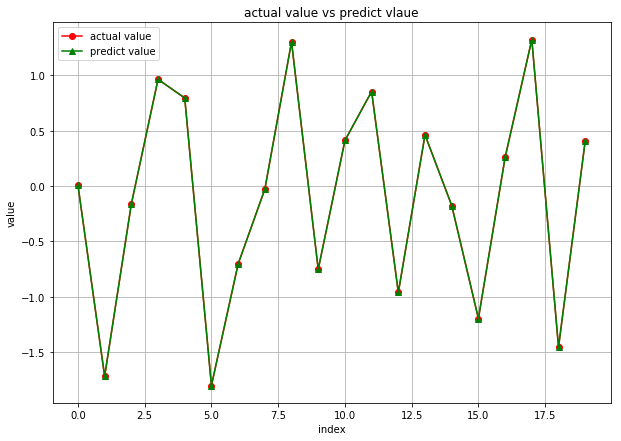

In [6]:
from sklearn.linear_model import LinearRegression as lr_model
from sklearn.metrics import mean_squared_error as mse, r2_score

# use linear regression model to fit target value 
def run_lr_model(X, Y, display_log = False):
    # 随机划分为训练子集和测试子集，比例4:1（由test_size参数指定，在0-1之间，表示样本占比，整数的话就是样本的数量），随机数的种子10
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)
    
    # 创建线性回归对象，基于最小二乘法的线性回归
    # 可以阅读下 https://blog.csdn.net/weixin_39175124/article/details/79465558
    model = lr_model()
    # 训练模型
    model_fit = model.fit(X_train, Y_train)
    
    # 用模型预测训练集标签（个人见解，这一步没什么卵用，本来就是用训练集训练的模型，再用回过来用它预测训练集，没意义）
    train_predict = model_fit.predict(X_train)
    train_mse_val = np.sqrt(mse(Y_train, train_predict))
    train_r2 = r2_score(Y_train, train_predict)
    
    # 用模型预测测试集标签
    test_predict =  model_fit.predict(X_test)
    # mean_squared_error(即mse(Y_test, test_predict))，均方误差，回归器性能评价
    # 可阅读 https://blog.csdn.net/Dear_D/article/details/86136779
    # np.sqrt() numpy里面的求平方根
    test_mse_val = np.sqrt(mse(Y_test, test_predict))
    # 决定系数（拟合优度），另一种性能评价。模型越好：r2→1，模型越差：r2→0
    test_r2 = r2_score(Y_test, test_predict)
    
    if display_log == True:
        print "Training data metrics:"
        print "RMSE: ", train_mse_val
        print "R2 score: ", train_r2
        print

        print "Testing data metrics:"
        print "RMSE:", test_mse_val
        print "R2 score:", test_r2

        plot(X_test, Y_test, test_predict)
    
    return train_predict, train_mse_val, train_r2, test_predict, test_mse_val, test_r2

# plot actual value vs predict value
# 绘制折线图
# https://www.cnblogs.com/onemorepoint/p/7482644.html
# https://blog.csdn.net/vvyuervv/article/details/62884787
def plot(X, Y_target, Y_predict):
    fig = plt.figure(figsize=(10,7))   # 创建10 x 7的窗口
    # 绘制。X轴数据0到len(X), Y轴数据，红色、实线连接、实心圈，图例标签
    plt.plot(range(len(X)), Y_target,  '-ro',label = 'actual value')
    # X轴数据0到len(X), Y轴数据，绿色、实线连接、角朝上的三角形，图例标签
    plt.plot(range(len(X)), Y_predict,'-g^', label = 'predict value')
    # 显示网格线
    plt.grid(True)
    # 设置图例显示的位置左上
    plt.legend(loc = 0) 
    # 设置坐标轴属性，调整坐标和输入的数据范围一致
    plt.axis('tight')
    # X轴为index
    plt.xlabel('index')
    # Y轴为value
    plt.ylabel('value')
    # 标题为 actual value vs predict vlaue
    plt.title('actual value vs predict vlaue')
    # 显示图表
    plt.show()

# use linear regression model to fit target value 
_ = run_lr_model(normal_feature_mat, target_mat, True)


note: predicted value is similar to actual value

# 3. Reduce Dimensions And Train Model

In [11]:
# use pca to reduce dimension
# numpy计算PCA
# https://www.jianshu.com/p/044a7783980f
def pca_reducer(data_mat, top_n_feat = 9999999):
        '''
        use pca algorithm to reduce dimension
        :param data_mat: input data mat
        :param top_n_feat: selected features num
        :return: top n useful features
        '''
        # subtract mean values
        mean_vals = np.mean(data_mat, axis = 0)  # 均值
        mean_removed = data_mat - mean_vals

        # calculate covariance matrix
        # 协方差，用于衡量两个变量的总体误差 https://blog.csdn.net/jeffery0207/article/details/83032325
        cov_mat = np.cov(mean_removed, rowvar = 0) 

        # calculate eigenvalues and eigenvectors
        # 求解特征值和特征向量
        eig_vals, eig_vects = linalg.eig(np.mat(cov_mat))

        # sort eigenvalues in ascending order
        # 返回从小到大的索引值
        eig_vals_index = np.argsort(eig_vals)
        # 指定区间的索引值倒序
        eig_vals_index = eig_vals_index[:-(top_n_feat + 1):-1]
        # 除去不需要的特征向量
        red_eig_vects = eig_vects[:, eig_vals_index]

        # transform data to a new sapce
        # 降维后恢复
        low_dim_data_mat = mean_removed * red_eig_vects
        return low_dim_data_mat

# 计算PCA的另一种方法：SVD 奇异值分解
# https://www.e-learn.cn/content/qita/786999
def svd_reducer(data_mat, top_n_feat = 99999):
        '''
        use SVD algorithm to reduce dimension
        :param data_mat: input data mat
        :param top_n_feat: selected features num
        :return: top n useful features
        '''
        data_mat = data_mat.T
        rows = np.shape(data_mat)[0]
        cols = np.shape(data_mat)[1]
        u, sigma, vt = linalg.svd(data_mat)
        feat_num = min(top_n_feat, cols)
        sig = np.mat(np.eye(feat_num) * sigma[: feat_num]) #arrange sig into a diagonal matrix
        np.dot(data_mat.T , u[:,:feat_num])
        final_mat = np.dot( np.dot(data_mat.T , u[:,:feat_num]), sig.I)  #create transformed items
        return final_mat

def search_best_feature_num_in_dims_reducer(X, Y, method = "pca"):
    total_feature_num = X.shape[1]
    mse_list = []
    r2_score_list = []
    # 实际上就是逐步减少特征值数量（降维），然后训练预测数据集，来查看均方根误差和决定系数的变化
    for fea_num in xrange(1, total_feature_num + 1):
        
        if method == "pca":
            reducer_X = pca_reducer(X, fea_num) # use pca 
        elif method == "svd":
            reducer_X = svd_reducer(X, fea_num) # use svd
        
        train_predict, train_mse_val, train_r2, test_predict, test_mse_val, test_r2 = run_lr_model(reducer_X, Y)
        mse_list.append(test_mse_val)
        r2_score_list.append(test_r2)
        
    min_mse = min(mse_list)
    min_feature_num = mse_list.index(min_mse) + 1
    return mse_list, r2_score_list, min_feature_num, min_mse

# 绘制均方根误差、决定系数随维度变化折线图，原理和上面的绘图一样
def plot_error(mse_list, r2_score_list, method = ""):
    fig, ax1 = plt.subplots(figsize=(10,7)) 

    x = range(1, len(mse_list) + 1)
    plt.plot(x, mse_list, '-ro', label = 'test data rmse')
    plt.grid(True)
    plt.legend(loc = 0) 
    plt.axis('tight')
    plt.xlabel('feature num')
    plt.ylabel('RMSE')
    plt.title('RMSE or R2 Score vs Feature num after ' + method)

    ax2 = ax1.twinx()  
    plt.plot(x, r2_score_list, '-b^', label = 'test data r2 score')
    plt.legend(loc = 0)
    plt.ylabel('R2 Score')
    plt.show()


use PCA to reduce dimensions
min rmse: 2.975317380903209e-15
min_feature_num: 51


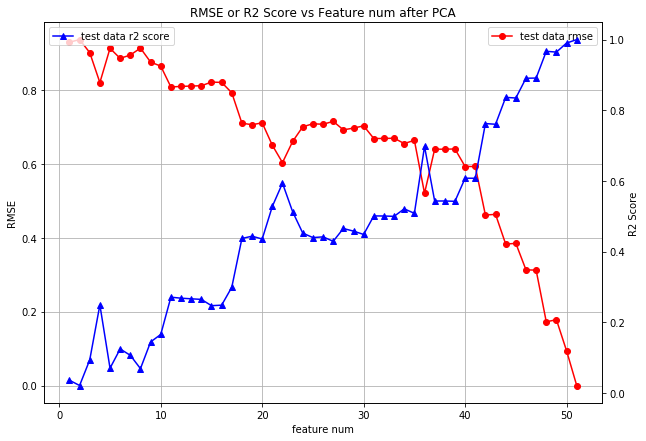




use SVD to reduce dimensions
min rmse: 4.552408942174873e-15
min_feature_num: 51


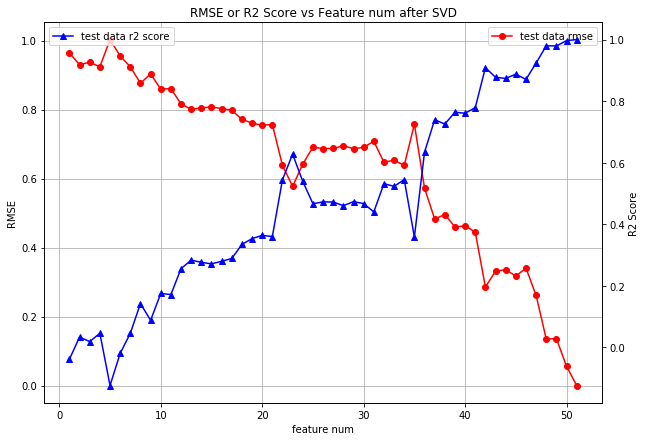

In [10]:

# search best feature num in pca to reduce dimensions        
mse_list, r2_score_list, min_feature_num, min_mse = search_best_feature_num_in_dims_reducer(normal_feature_mat, target_mat, "pca")
print "use PCA to reduce dimensions"
print "min rmse:",  min_mse
print "min_feature_num:", min_feature_num
plot_error(mse_list, r2_score_list, "PCA")  
print "\n\n"

# search best feature num in svd to reduce dimensions          
mse_list, r2_score_list, min_feature_num, min_mse = search_best_feature_num_in_dims_reducer(normal_feature_mat, target_mat, "svd")
print "use SVD to reduce dimensions"
print "min rmse:",  min_mse
print "min_feature_num:", min_feature_num
plot_error(mse_list, r2_score_list, "SVD")       
        

note: the more feature dimensions the better. Reducing dimension is not necessary for this case.